In [48]:
# ライブラリのimport
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# シグモイド関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# tanh関数
def tanh(x):
    return np.tanh(x)

In [50]:
# 入力データの生成
input_data = np.random.randn(1000, 100)

In [51]:
node_num = 100 # 隠れ層のノード（ニューロン）の数
hidden_layer_size = 5 # 隠れ層が５層
activations = {} # ここにアクティベーションの結果を格納する

In [52]:
x = input_data

In [53]:
# ニューラルネットワークの順伝搬
for i in range(hidden_layer_size):
    
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1
    
    z = np.dot(x, w)
    a = sigmoid(z) # シグモイド関数
    activations[i] = a

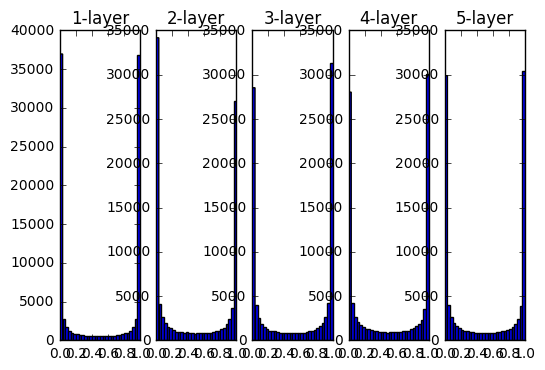

In [54]:
# ヒストグラムの描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+'-layer')
    plt.hist(a.flatten(), 30, range=(0, 1))

#### 上の結果から0と1への偏りが存在しているので、勾配消失の問題が生じる

In [55]:
# ニューラルネットワークの順伝搬
for i in range(hidden_layer_size):
    
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 0.01
    
    z = np.dot(x, w)
    a = sigmoid(z) # シグモイド関数
    activations[i] = a

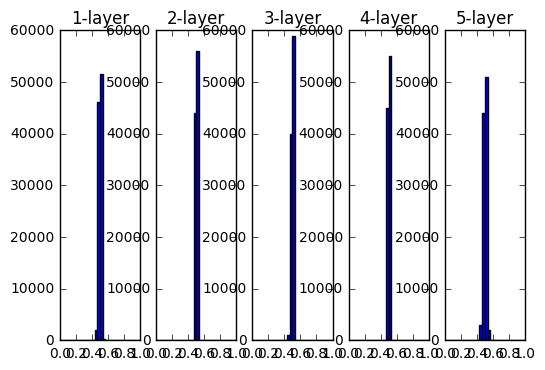

In [56]:
# ヒストグラムの描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+'-layer')
    plt.hist(a.flatten(), 30, range=(0, 1))

#### 上の結果から0と1への偏りがなくなり、0.5付近に集中する分布となった。
#### これにより、勾配消失の問題が発生することがなくなった。
#### しかし、アクティベーションに偏りが存在するということは、１個のニューロンでも表現できるという点で表現力に問題が生じる。

In [74]:
# ニューラルネットワークの順伝搬
for i in range(hidden_layer_size):
    
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

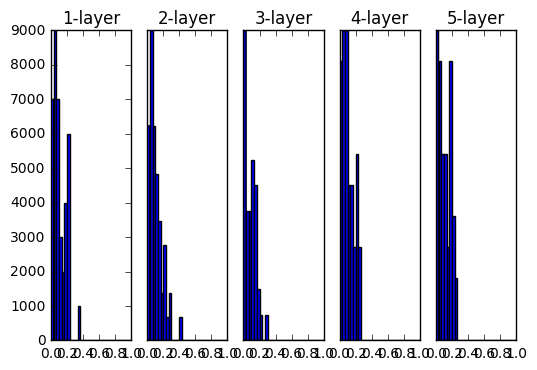

In [75]:
# ヒストグラムの描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1)+'-layer')
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0, 1))

#### 上の図を見ると, 偏りがなく, データに広がりがあるということがわかる。
#### このことより, シグモイド関数の表現力が制限されていなく, 効率良く学習できているということが分かる。